In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

def plot_avg_isi(note, avg_isi, freq=None):
    x = list(range(len(avg_isi)))
    y = avg_isi
    plt.plot(x, y)
    plt.title(f"Average ISI for {note}")
    plt.xlabel("Spike Train")
    plt.ylabel("Average ISI")
    plt.show()

def plot_counts(note, counts):
    counts_short = counts
    x = np.arange(len(counts_short))
    plt.plot(x, counts_short)
    plt.title(note)
    plt.xlabel("Spike Train")
    plt.ylabel("Counts")
    plt.show()

NOTES_DIR = "../Iowa Notes/Mono"

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


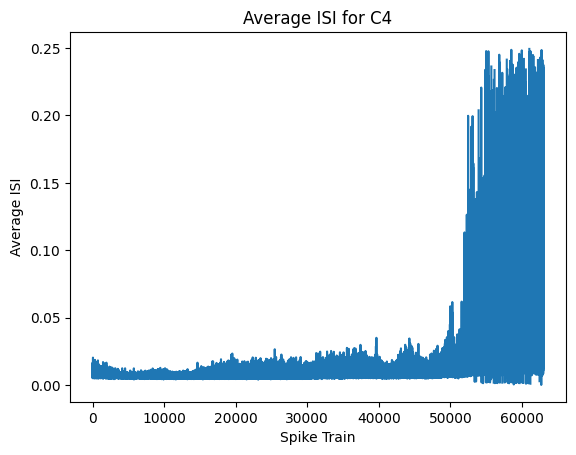

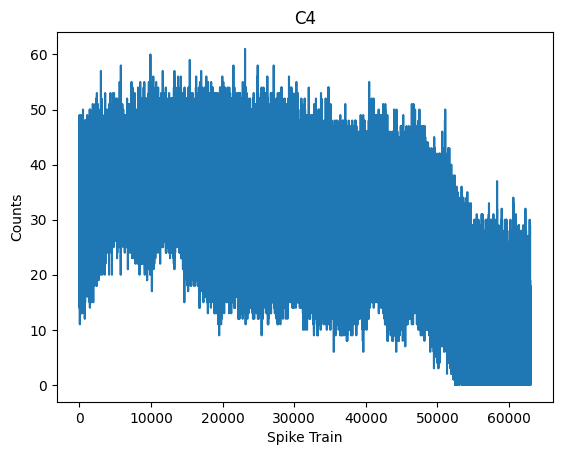

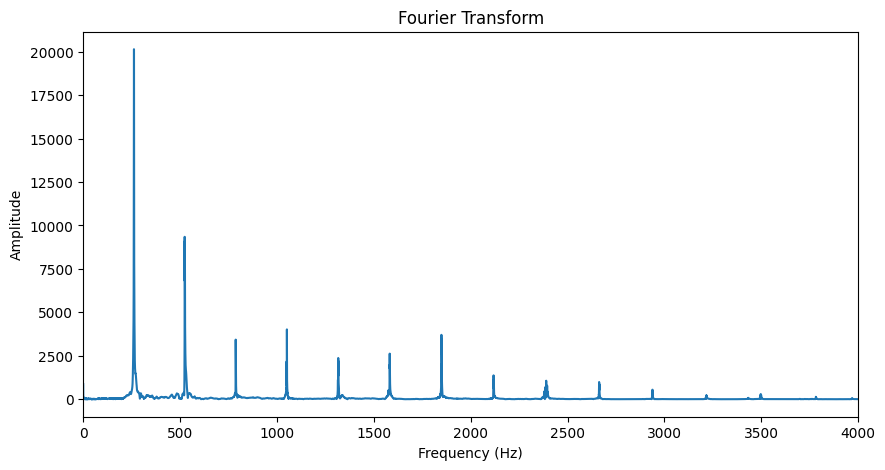

In [2]:
from analysis.spectral import fourier_note
from analysis.spatial import count_spikes_optimized
from analysis.temporal import get_avg_isi
from model import get_spikes

note = "C4"
spikes = get_spikes(note)

avg_isi = get_avg_isi(spikes)
plot_avg_isi(note, avg_isi)

counts = count_spikes_optimized(spikes)
plot_counts(note, counts)

fourier_note(note=note, shouldPlot=True)

In [3]:
from analysis.musical import calculate_intervals, CONSONANCE_ORDER
root_note = "C4"
intvls = calculate_intervals(root_note)

most_consonant = intvls[CONSONANCE_ORDER[0]]
least_consonant = intvls[CONSONANCE_ORDER[-1]]

root_spikes = get_spikes(root_note)
most_consonant_spikes = get_spikes(most_consonant)
least_consonant_spikes = get_spikes(least_consonant)

from analysis.temporal import create_concurrency_profile

root_profile = [create_concurrency_profile(cf) for cf in root_spikes]
most_consonant_profile = [create_concurrency_profile(cf) for cf in most_consonant_spikes]
least_consonant_profile = [create_concurrency_profile(cf) for cf in least_consonant_spikes]


In [4]:
from analysis.spectral import decode
BASE = 8

root_decoded = [decode(conc_prof, BASE) for conc_prof in root_profile]
most_consonant_decoded = [decode(conc_prof, BASE) for conc_prof in most_consonant_profile]
least_consonant_decoded = [decode(conc_prof, BASE) for conc_prof in least_consonant_profile]

# Plot root_decoded and most_consonant_decoded in seprate colours with most_consonant_decoded overlapping root_decoded and a wide figure size

x = np.arange(len(root_decoded))


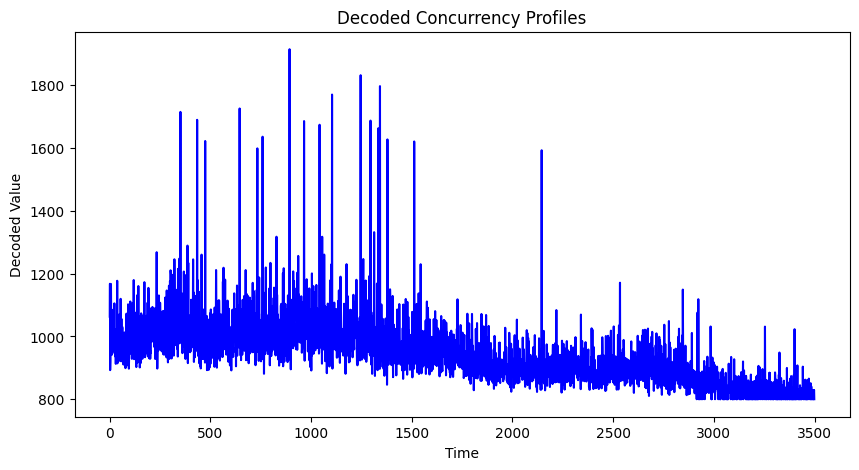

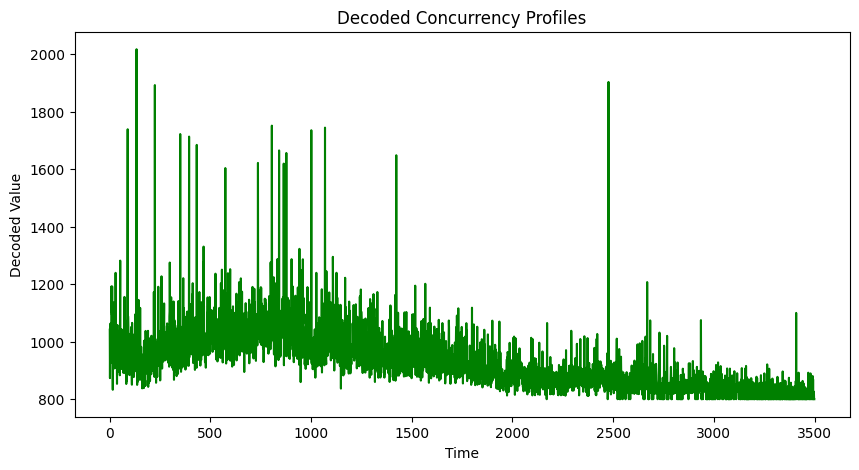

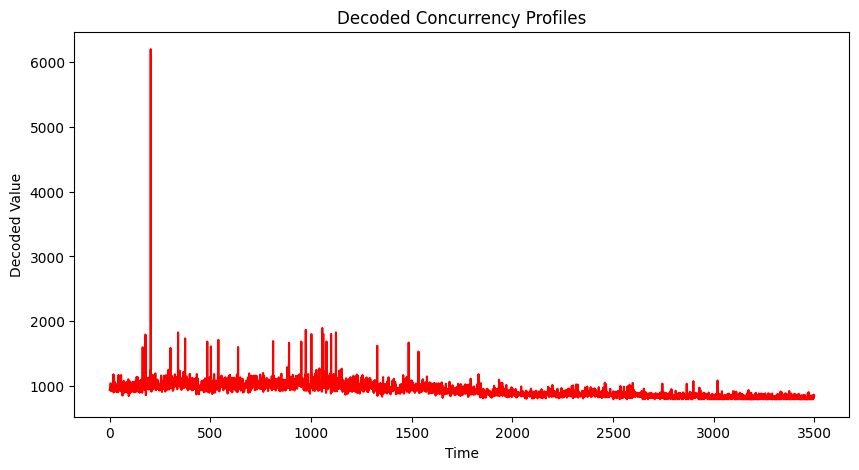

In [5]:

x = np.arange(len(root_decoded))
plt.figure(figsize=(10, 5))
plt.plot(x, root_decoded, color='blue')
plt.title("Decoded Concurrency Profiles")
plt.xlabel("Time")
plt.ylabel("Decoded Value")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x, most_consonant_decoded, color='green')
plt.title("Decoded Concurrency Profiles")
plt.xlabel("Time")
plt.ylabel("Decoded Value")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x, least_consonant_decoded, color='red')
plt.title("Decoded Concurrency Profiles")
plt.xlabel("Time")
plt.ylabel("Decoded Value")
plt.show()

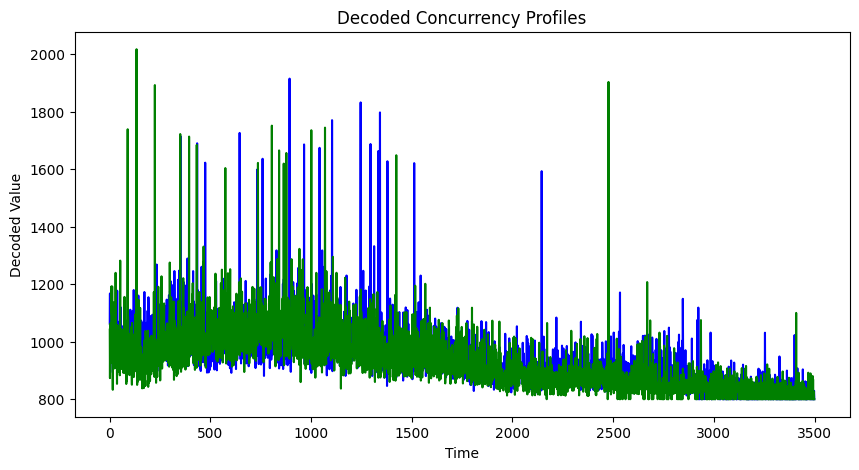

In [8]:
x = np.arange(len(root_decoded))
plt.figure(figsize=(10, 5))
plt.plot(x, root_decoded, color='blue')
plt.plot(x, most_consonant_decoded, color='green')
plt.title("Decoded Concurrency Profiles")
plt.xlabel("Time")
plt.ylabel("Decoded Value")
plt.show()

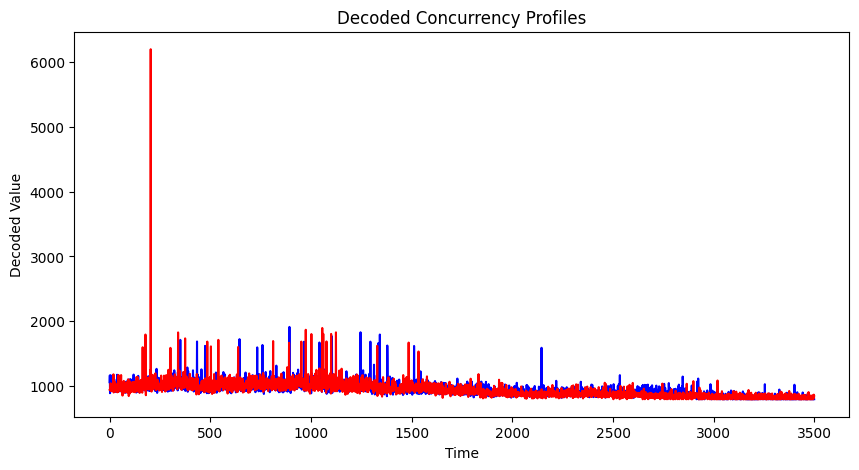

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(x, root_decoded, color='blue')
plt.plot(x, least_consonant_decoded, color='red')
plt.title("Decoded Concurrency Profiles")
plt.xlabel("Time")
plt.ylabel("Decoded Value")
plt.show()
